- # **4. Modelamiento, Evaluación e Interpretación**


- ## **4.1 Selección del Modelo**

En el presente apartado se trabaja la etapa de modelado (construcción, evaluación y despliegue de modelos) para extraer información valiosa de los datos, para el presente proyecto realizaremos un exploración con tres modelos diferentes de clasificación:

- Arbol de decisión
- SVM
- Regresión Logística

Y finalmente tendrá como objetivo escoger el que mejor metrica de desempeño arroje según modelo.

In [2]:
#Cargamos librerías principales
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
#Cargamos el dataset preprocesado
data = pd.read_csv('data_preprocesada.csv')
data.head()

,Age,Income,previous_sales,Num_Contacts,Satisfaction_Score,IL,Email,Online Chat,Phone,C,Sales
0,0.791168,0.734376,1,1,4,0,1,0,0,0,0
1,-0.158423,0.861337,5,2,4,0,0,0,1,0,1
2,-1.453319,-0.329948,3,4,5,0,0,1,0,1,1
3,1.309127,0.488233,0,3,2,1,1,0,0,0,0
4,1.654433,-0.740072,0,1,4,0,1,0,0,0,0


### **División 70 - 30**
En este apartado se realiza la **división 70-30** del dataset **"data"** cuyo objetivo principal permitir el entrenamiento y la evaluación efectiva de modelos de clasificación. Se  separaran los datos en dos conjuntos distintos: un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) en pro de mejorar la capacidad de los modelos de clasificación para generalizar a datos no vistos y se facilita la evaluación de su rendimiento:

<Axes: xlabel='Sales'>

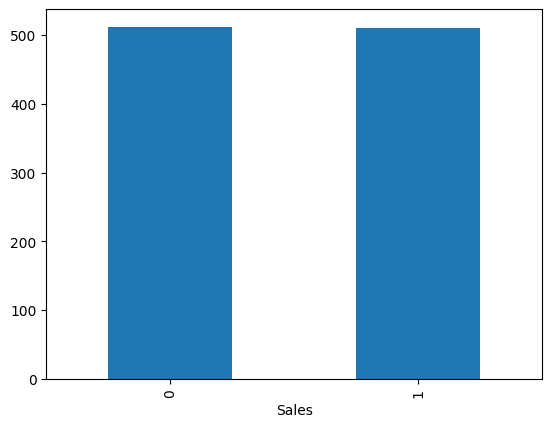

In [75]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Sales", axis = 1) # En X se guarda todo el dataset (Variables predictoras) salvo la variable objetivo "Sales".
Y = data['Sales'] # En Y se almacena la variable objetivo "Sales".
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Se realizará un muestreo estratificado.
Y_train.value_counts().plot(kind='bar') # Graficamos los datos de entrenamiento de la variable objetivo.

- ## **4.2 Hiperparametrización**


En el siguiente apartado; se procede a realizar hiperparametrización **conjunto de datos de entrenamiento (70%)** para los modelos de:

- Arbol de decisión
- SVM
- Regresión Logística

### **4.2.1 Hiperparametrización Arbol de Clasificación**

In [7]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

In [12]:
# Importaciones necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Definición del modelo y parámetros para GridSearch
modelTree = DecisionTreeClassifier()
criterion = ['entropy', 'gini']  # Índice de información
min_samples_leaf = [2, 10, 50, 100]  # Cantidad mínima de muestras por hoja
max_depth = [None, 10, 20, 50]  # Profundidad máxima del árbol

param_grid = {
    'criterion': criterion,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth
}

# Creación y ejecución del GridSearch
grid = GridSearchCV(estimator=modelTree, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)  # Asume que X_train y Y_train están previamente definidos

# Establecimiento del mejor modelo
modelTree = grid.best_estimator_

# Obtención de las mejores métricas y parámetros
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Tree'] = grid.best_score_

print("Mejores parámetros:", grid.best_params_)
print(medidas)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10}
                 Tree
f1 de la CV  0.916872


### **4.2.2 Hiperparametrización SVM para Clasificación**

In [9]:
#SVM
from sklearn.svm import SVC
modelSVM = SVC()

# Definir los hiperparametros
C=[0.1,1,10] #Margen blando
kernel=['linear'] #'linear', 'poly', 'rbf', 'sigmoid'
gamma=['scale']

#Grid
param_grid = dict(C=C, kernel=kernel,gamma=gamma)
grid = GridSearchCV(estimator=modelSVM, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)
grid.fit(X_train, Y_train)

#Mejor modelo
modelSVM= grid.best_estimator_

#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])
medidas['SVM']=grid.best_score_

# Mejores párametros
print( grid.best_params_)

print(medidas)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
                  SVM
f1 de la CV  0.867942


### **4.2.3 Hiperparametrización para Regresión Logística**

In [10]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística
modelLogistic = LogisticRegression()

# Definir los hiperparámetros
penalty = ['l1', 'l2']  # Tipo de penalización
C = [0.001, 0.01, 0.1, 1, 10, 100]  # Parámetro de regularización

# Crear un diccionario con los hiperparámetros
param_grid = {'penalty': penalty, 'C': C}

# Crear un objeto GridSearchCV
grid = GridSearchCV(estimator=modelLogistic, param_grid=param_grid, scoring='f1_macro', n_jobs=-1, cv=10)

# Ajustar el modelo de regresión logística
grid.fit(X_train, Y_train)

# Mejor modelo
modelLogistic = grid.best_estimator_

# Medida de evaluación del mejor modelo
medidas = pd.DataFrame(index=['f1 de la CV'])
medidas['Logistic'] = grid.best_score_

# Mejores párametros
print(grid.best_params_)
print(medidas)

{'C': 1, 'penalty': 'l2'}
             Logistic
f1 de la CV  0.864984


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

 ## **4.3 Evaluación de los mejores modelos con el 30%**

En este apartado realizaremos la evaluación de modelos con el 30% de los datos, proceso esencial para medir y comparar el rendimiento de los diferentes hiperparametrizados en el aparatado anterior y determinar cuál es el más adecuado para abordar nuestro problema específico de predicción de venta efectiva. Cabe mencionar que este proceso es fundamental para garantizar que los modelos sean útiles y confiables en la toma de decisiones basadas en datos.

### **4.3.1 Evaluamos el arbol de clasificación**

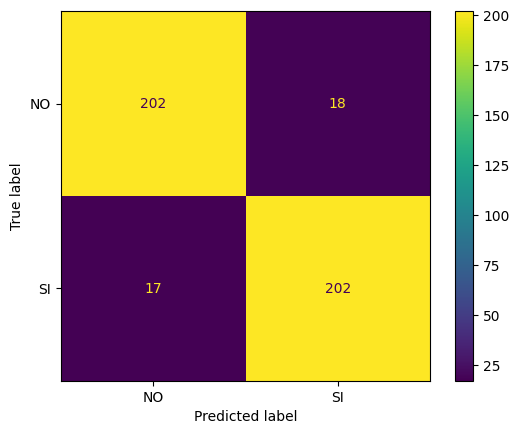

              precision    recall  f1-score   support

          NO       0.92      0.92      0.92       220
          SI       0.92      0.92      0.92       219

    accuracy                           0.92       439
   macro avg       0.92      0.92      0.92       439
weighted avg       0.92      0.92      0.92       439



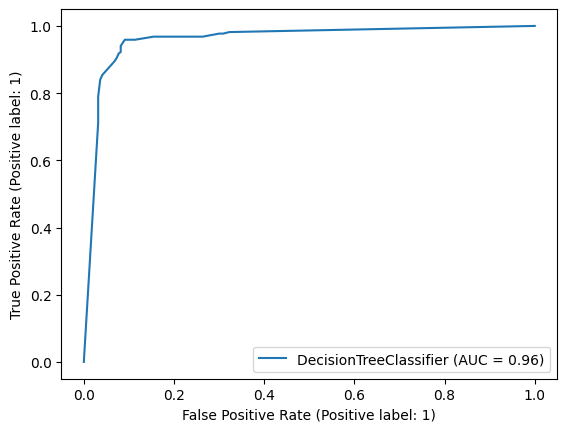

In [13]:
Y_pred = modelTree.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'SI'])
disp.plot()
plt.show()

# Reporte de clasificación
print(classification_report(Y_test, Y_pred, target_names=['NO', 'SI']))

# Curva ROC
RocCurveDisplay.from_estimator(modelTree, X_test, Y_test)
plt.show()

### **4.3.2. Evaluamos el SVM**


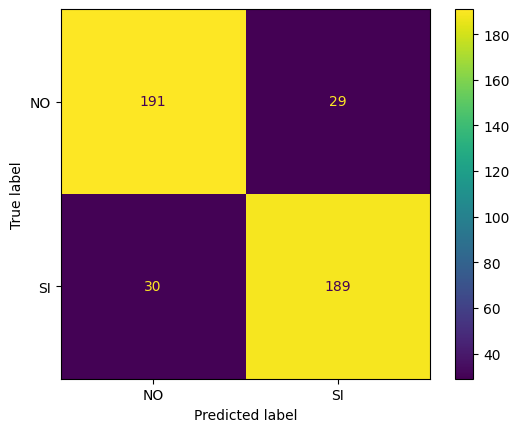

              precision    recall  f1-score   support

          NO       0.86      0.87      0.87       220
          SI       0.87      0.86      0.86       219

    accuracy                           0.87       439
   macro avg       0.87      0.87      0.87       439
weighted avg       0.87      0.87      0.87       439



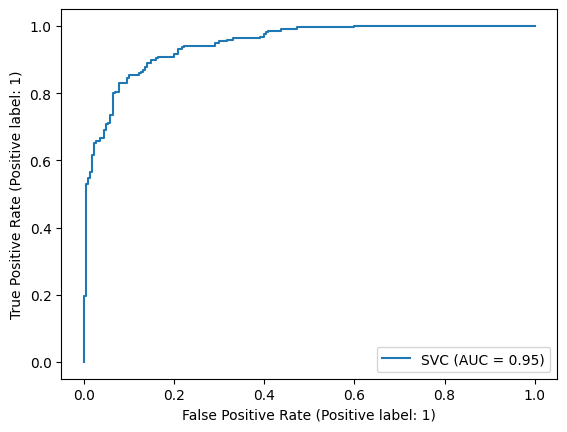

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, classification_report
import matplotlib.pyplot as plt

Y_pred = modelSVM.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'SI'])
disp.plot()
plt.show()

# Precisión, Recall, F1, Exactitud
print(classification_report(Y_test, Y_pred, target_names=['NO', 'SI']))

# Curva ROC
RocCurveDisplay.from_estimator(modelSVM, X_test, Y_test)
plt.show()

### **4.3.3. Evaluamos la regresión logística**

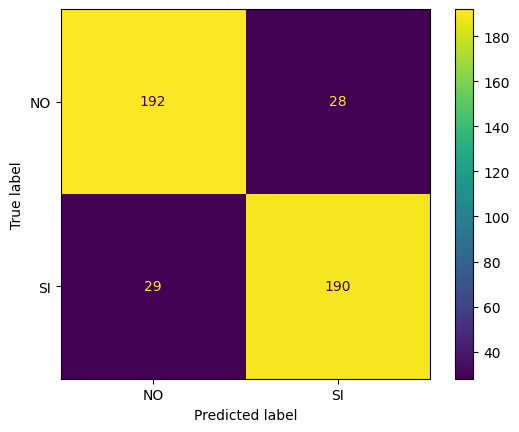

              precision    recall  f1-score   support

          NO       0.87      0.87      0.87       220
          SI       0.87      0.87      0.87       219

    accuracy                           0.87       439
   macro avg       0.87      0.87      0.87       439
weighted avg       0.87      0.87      0.87       439



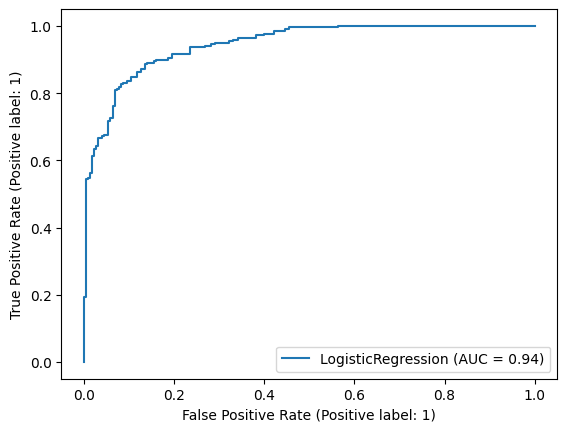

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, classification_report
import matplotlib.pyplot as plt


Y_pred = modelLogistic.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NO', 'SI'])
disp.plot()
plt.show()

# Precisión, Recall, F1, Exactitud
print(classification_report(Y_test, Y_pred, target_names=['NO', 'SI']))

# Curva ROC
RocCurveDisplay.from_estimator(modelLogistic, X_test, Y_test)
plt.show()

En la busqueda del mejor modelo para implementar en las etapas de entrenamiento con los hiperparametros los mejores resultados de cada uno fueron los siguientes, midiendolos con la metrica f1-score:

- Arbol: 0.916872
- SVM: 0.867942
- Regresión logística: 0.864984

Obteniendo mejor desempeño el arbol.

Al momento de evaluar estos modelos con el set de test observamos que cada uno obtuvo un f1-score de:
- Arbol: 0.92
- SVM: 0.87
- Regresión logística: 0.87

Donde sigue con mejor desempeño el Arbol.

- # **5. Medida de Calidad del Modelo**

De acuerdo a la busqueda de hiperparámetros que realizamos anteriormente, a continuación procedemos a su aplicación para evaluar y seleccionar el modelo que mejor desempeño arroje, teniendo como base la metrica **F1-Score**, toda vez que combina la precisión y el recall:

## **5.1 Validación cruzada**


- ### **5.1.1. Arbol de clasificación:**

In [76]:
from sklearn import tree
from sklearn.model_selection import cross_validate

# Preparando los datos
X = data.drop("Sales", axis=1)
Y = data['Sales']

# Definiendo el modelo
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=None)

# Realizando la validación cruzada y guardando los estimadores
results = cross_validate(model, X, Y, cv=10,
                         scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'),
                         return_train_score=False, return_estimator=True)

# Imprimir métricas promedio
print('Accuracy:', results['test_accuracy'].mean())
print('Precision:', results['test_precision_weighted'].mean())
print('Recall:', results['test_recall_weighted'].mean())
print('F1:', results['test_f1_weighted'].mean())


Accuracy: 0.9111219830397912
Precision: 0.9143238892017918
Recall: 0.9111219830397912
F1: 0.9109298505317381


- ### **5.1.2. SVM:**

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

# Preparar los datos
X = data.drop("Sales", axis=1)
Y = data['Sales']

# Definir el modelo con la opción de probabilidades habilitada
modelSVM = SVC(C=10, gamma='scale', kernel='linear', probability=True)

# Aplicar validación cruzada y guardar los modelos
resultsSVM = cross_validate(modelSVM, X, Y, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), return_train_score=False, return_estimator=True)

# Imprimir los resultados
print('SVM Accuracy:', resultsSVM['test_accuracy'].mean())
print('SVM Precision:', resultsSVM['test_precision_weighted'].mean())
print('SVM Recall:', resultsSVM['test_recall_weighted'].mean())
print('SVM F1:', resultsSVM['test_f1_weighted'].mean())



SVM Accuracy: 0.8796896840928152
SVM Precision: 0.88432375895839
SVM Recall: 0.8796896840928152
SVM F1: 0.8791371913008394


- ### **5.1.3. Regresión Logística:**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy as np

# Preparar los datos
X = data.drop("Sales", axis=1)
Y = data['Sales']

# Configurar el modelo de Regresión Logística con hiperparámetros específicos
modelLR = LogisticRegression(C=1, penalty='l2')

# Aplicar validación cruzada y guardar los estimadores
resultsLR = cross_validate(modelLR, X, Y, cv=10, scoring=('f1_weighted', 'accuracy', 'precision_weighted', 'recall_weighted'), return_train_score=False, return_estimator=True)

# Imprimir los resultados
print('Logistic Regression Accuracy:', resultsLR['test_accuracy'].mean())
print('Logistic Regression Precision:', resultsLR['test_precision_weighted'].mean())
print('Logistic Regression Recall:', resultsLR['test_recall_weighted'].mean())
print('Logistic Regression F1:', resultsLR['test_f1_weighted'].mean())



Logistic Regression Accuracy: 0.8728357096263164
Logistic Regression Precision: 0.8772428930115298
Logistic Regression Recall: 0.8728357096263164
Logistic Regression F1: 0.8723377799773541


De acuerdo a la metrica selecciona (F1-score), identificamos que de los tres modelos entrenados el que mejor resultado obtuvo fue el arbol de decisión con un procentaje de 91%, seguido del SVM con 87.9% y la regresión con 87,2%.  

# **5.2. Almacenamiento de los modelos**

Teniendo en que cuenta que la función cross_validate esta entrenando modelos internamente (uno por cada partición de validación cruzada) para realizar estimaciones de rendimiento, pero no los devuelve para su uso posterior, se decide entrenar un modelo final de forma independiente y guardarlo:

- ## **5.2.1 Entrenamiento final y guardado del modelo arbol de clasificación:**

In [82]:
from sklearn.tree import DecisionTreeClassifier
import pickle
import numpy as np
import pandas as pd

# Configurar y entrenar el modelo de Árbol de Clasificación
modelTree_final = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=None)
modelTree_final.fit(X, Y)

# Guardar el modelo de Árbol de Clasificación
filename_tree = 'modelo_arbol_clasificacion.pkl'
with open(filename_tree, 'wb') as file:
    pickle.dump(modelTree_final, file)

print("Modelo de Árbol de Clasificación guardado con éxito.")




Modelo de Árbol de Clasificación guardado con éxito.


- ## **5.2.2. Entrenamiento final y guardado del modelo SVM:**

In [83]:
from sklearn.svm import SVC
import pickle

# Configurar y entrenar el modelo SVM con capacidad para predecir probabilidades
modelSVM_final = SVC(C=10, gamma='scale', kernel='linear')
modelSVM_final.fit(X, Y)

# Guardar el modelo SVM
filename_svm = 'modelo_svm.pkl'
with open(filename_svm, 'wb') as file:
    pickle.dump(modelSVM_final, file)

print("Modelo SVM guardado con éxito.")

Modelo SVM guardado con éxito.


- ## **5.2.3 Entrenamiento final y guardado del modelo regresión logística:**

In [84]:
from sklearn.linear_model import LogisticRegression
import pickle

# Configuración del modelo y entrenamiento con todos los datos
modelLR_final = LogisticRegression(C=1, penalty='l2')  # Solver especificado para compatibilidad
modelLR_final.fit(X, Y)

# Guardar el modelo entrenado
filename = 'modelo_regresion_logistica.pkl'
with open(filename, 'wb') as file:
    pickle.dump(modelLR_final, file)

print("Modelo de Regresión Logística guardado con éxito.")

Modelo de Regresión Logística guardado con éxito.


## **6. Despliegue**

**En el sisguiente apartado se realiza el despliegue de modelos, despliegue mediante el cual se busca transformar la información en acciones concretas y valiosas para la toma de desiciones. Para realizar el despliegue de los modelos se ingresan datos que no fueron utilizados para el entrenamiento**.

In [85]:
#Predicción de datos futuros
data_fut = pd.read_excel("Sales_outbound_New.xlsx", sheet_name=0)
data_fut.head()

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
0,1,NaN,51,FL,80000,12000.00,1,B,Email,05:30:00,1,4
1,2,NaN,40,CA,82579,12386.85,5,A,Phone,16:45:00,2,4
2,3,NaN,25,NY,58380,8757.00,3,C,Online Chat,06:30:00,4,5
3,4,NaN,57,IL,75000,11250.00,0,A,Email,05:30:00,3,2
4,5,NaN,61,CA,50049,7507.35,0,B,Email,09:00:00,1,4


Se realiza un breve ETL a la data futura para poder trabajar la misma en el despliegue de los modelos:

In [86]:
#Eliminación de variables irrelevantes
data_fut.drop('Client_ID', axis=1, inplace=True)
data_fut.drop('Name', axis=1, inplace=True)

In [87]:
#Definimos los tipos de datos del dataset
data_fut['Location'] = data_fut['Location'].astype('category')
data_fut['Type_of_Products'] = data_fut['Type_of_Products'].astype('category')
data_fut['Contact_Channel'] = data_fut['Contact_Channel'].astype('category')
data_fut['Contact_hour'] = pd.to_datetime(data_fut['Contact_hour'], format='%H:%M:%S')


In [88]:
data_fut.head()

,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
0,51,FL,80000,12000.00,1,B,Email,1900-01-01 05:30:00,1,4
1,40,CA,82579,12386.85,5,A,Phone,1900-01-01 16:45:00,2,4
2,25,NY,58380,8757.00,3,C,Online Chat,1900-01-01 06:30:00,4,5
3,57,IL,75000,11250.00,0,A,Email,1900-01-01 05:30:00,3,2
4,61,CA,50049,7507.35,0,B,Email,1900-01-01 09:00:00,1,4


In [89]:
#Variables dummies para convertir las variable Location
dummies_location = pd.get_dummies(data_fut['Location'])
data_fut = data_fut.drop('Location', axis=1)
data_fut = data_fut.join(dummies_location)

data_fut.head()

,Age,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,CA,FL,IL,NY,TX
0,51,80000,12000.00,1,B,Email,1900-01-01 05:30:00,1,4,False,True,False,False,False
1,40,82579,12386.85,5,A,Phone,1900-01-01 16:45:00,2,4,True,False,False,False,False
2,25,58380,8757.00,3,C,Online Chat,1900-01-01 06:30:00,4,5,False,False,False,True,False
3,57,75000,11250.00,0,A,Email,1900-01-01 05:30:00,3,2,False,False,True,False,False
4,61,50049,7507.35,0,B,Email,1900-01-01 09:00:00,1,4,True,False,False,False,False


In [90]:
#Variables dummies para convertir la variable Contact_Channel
dummies_contact = pd.get_dummies(data_fut['Contact_Channel'])
data_fut = data_fut.drop('Contact_Channel', axis=1)
data_fut = data_fut.join(dummies_contact)

data_fut.head()

,Age,Income,TAX,previous sales_#,Type_of_Products,Contact_hour,Num_Contacts,Satisfaction_Score,CA,FL,IL,NY,TX,Email,Online Chat,Phone
0,51,80000,12000.00,1,B,1900-01-01 05:30:00,1,4,False,True,False,False,False,True,False,False
1,40,82579,12386.85,5,A,1900-01-01 16:45:00,2,4,True,False,False,False,False,False,False,True
2,25,58380,8757.00,3,C,1900-01-01 06:30:00,4,5,False,False,False,True,False,False,True,False
3,57,75000,11250.00,0,A,1900-01-01 05:30:00,3,2,False,False,True,False,False,True,False,False
4,61,50049,7507.35,0,B,1900-01-01 09:00:00,1,4,True,False,False,False,False,True,False,False


In [91]:
#Variables dummies para convertir la variable Type_of_Products
dummies_contact = pd.get_dummies(data_fut['Type_of_Products'])
data_fut = data_fut.drop('Type_of_Products', axis=1)
data_fut = data_fut.join(dummies_contact)

data_fut.head()

,Age,Income,TAX,previous sales_#,Contact_hour,Num_Contacts,Satisfaction_Score,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
0,51,80000,12000.00,1,1900-01-01 05:30:00,1,4,False,True,False,False,False,True,False,False,False,True,False
1,40,82579,12386.85,5,1900-01-01 16:45:00,2,4,True,False,False,False,False,False,False,True,True,False,False
2,25,58380,8757.00,3,1900-01-01 06:30:00,4,5,False,False,False,True,False,False,True,False,False,False,True
3,57,75000,11250.00,0,1900-01-01 05:30:00,3,2,False,False,True,False,False,True,False,False,True,False,False
4,61,50049,7507.35,0,1900-01-01 09:00:00,1,4,True,False,False,False,False,True,False,False,False,True,False


In [92]:
data_fut.rename(columns={'previous sales_# ': 'previous_sales'}, inplace=True)
data_fut.head()

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
0,51,80000,12000.00,1,1900-01-01 05:30:00,1,4,False,True,False,False,False,True,False,False,False,True,False
1,40,82579,12386.85,5,1900-01-01 16:45:00,2,4,True,False,False,False,False,False,False,True,True,False,False
2,25,58380,8757.00,3,1900-01-01 06:30:00,4,5,False,False,False,True,False,False,True,False,False,False,True
3,57,75000,11250.00,0,1900-01-01 05:30:00,3,2,False,False,True,False,False,True,False,False,True,False,False
4,61,50049,7507.35,0,1900-01-01 09:00:00,1,4,True,False,False,False,False,True,False,False,False,True,False


In [93]:
#Conversión a entero de las variables tipo bool
for column in data_fut.columns:
    if data_fut[column].dtype == 'bool':
        data_fut[column] = data_fut[column].astype(int)

In [63]:
data_fut.head()

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
0,51,80000,12000.00,1,1900-01-01 05:30:00,1,4,0,1,0,0,0,1,0,0,0,1,0
1,40,82579,12386.85,5,1900-01-01 16:45:00,2,4,1,0,0,0,0,0,0,1,1,0,0
2,25,58380,8757.00,3,1900-01-01 06:30:00,4,5,0,0,0,1,0,0,1,0,0,0,1
3,57,75000,11250.00,0,1900-01-01 05:30:00,3,2,0,0,1,0,0,1,0,0,1,0,0
4,61,50049,7507.35,0,1900-01-01 09:00:00,1,4,1,0,0,0,0,1,0,0,0,1,0


In [94]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador estándar
scaler = StandardScaler()

# Selecciona solo las columnas numéricas
columnas_numericas = ['Age', 'Income']

# Normaliza las columnas numéricas
data_fut[columnas_numericas] = scaler.fit_transform(data_fut[columnas_numericas])

data_fut.head()

,Age,Income,TAX,previous_sales,Contact_hour,Num_Contacts,Satisfaction_Score,CA,FL,IL,NY,TX,Email,Online Chat,Phone,A,B,C
0,0.734175,0.908235,12000.00,1,1900-01-01 05:30:00,1,4,0,1,0,0,0,1,0,0,0,1,0
1,-0.015138,1.030654,12386.85,5,1900-01-01 16:45:00,2,4,1,0,0,0,0,0,0,1,1,0,0
2,-1.036927,-0.118013,8757.00,3,1900-01-01 06:30:00,4,5,0,0,0,1,0,0,1,0,0,0,1
3,1.142890,0.670898,11250.00,0,1900-01-01 05:30:00,3,2,0,0,1,0,0,1,0,0,1,0,0
4,1.415368,-0.513465,7507.35,0,1900-01-01 09:00:00,1,4,1,0,0,0,0,1,0,0,0,1,0


In [95]:
data_fut = data_fut.drop('TAX', axis=1)
data_fut = data_fut.drop('Contact_hour', axis=1)
data_fut = data_fut.drop('CA', axis=1)
data_fut = data_fut.drop('FL', axis=1)
data_fut = data_fut.drop('NY', axis=1)
data_fut = data_fut.drop('TX', axis=1)
data_fut = data_fut.drop('A', axis=1)
data_fut = data_fut.drop('B', axis=1)


In [96]:
data_fut.head()


,Age,Income,previous_sales,Num_Contacts,Satisfaction_Score,IL,Email,Online Chat,Phone,C
0,0.734175,0.908235,1,1,4,0,1,0,0,0
1,-0.015138,1.030654,5,2,4,0,0,0,1,0
2,-1.036927,-0.118013,3,4,5,0,0,1,0,1
3,1.142890,0.670898,0,3,2,1,1,0,0,0
4,1.415368,-0.513465,0,1,4,0,1,0,0,0


Procedemos a realizar el cargue de cada uno de los modelos entrenados y guardados en el apartado anterior y se proceden a guardar en las archivos:

* **modelo_arbol_clasificacion**
* **modelo_regresion_logistica**
* **modelo_svm**


In [45]:
data_fut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 99 non-null     float64
 1   Income              99 non-null     float64
 2   previous_sales      99 non-null     int64  
 3   Num_Contacts        99 non-null     int64  
 4   Satisfaction_Score  99 non-null     int64  
 5   IL                  99 non-null     int64  
 6   Email               99 non-null     int64  
 7   Online Chat         99 non-null     int64  
 8   Phone               99 non-null     int64  
 9   C                   99 non-null     int64  
dtypes: float64(2), int64(8)
memory usage: 7.9 KB


In [101]:
import pickle

# Cargar el modelo de Árbol de Clasificación
filename_tree = 'modelo_arbol_clasificacion.pkl'
with open(filename_tree, 'rb') as file:   # 'rb' es para leer en modo binario
    modelTree_final = pickle.load(file)

Se realiza predicción del dataset de datos futuros con el modelo de **Arbol de Clasificación**:

In [105]:
# Hacer predicciones de clase con el modelo de Árbol de Clasificación
predictions_tree = modelTree_final.predict(data_fut)
print(f'Prediccion del modelo de Árboles de Clasificación: {predictions_tree}')

# Hacer predicciones de probabilidades de la clase positiva
probabilities_tree = modelTree_final.predict_proba(data_fut)
prob_class_positive = probabilities_tree[:, 1]
print("Probabilidades de la clase positiva para cada muestra:")
print(prob_class_positive)

# Crear un DataFrame para guardar los resultados junto con el conjunto de datos de predicción
results_df = pd.DataFrame(data_fut)
results_df['Predicted_Class'] = predictions_tree
results_df['Probability_Class_Positive'] = prob_class_positive

# Guardar los resultados en un archivo Excel
results_df.to_excel('Prediction_Results.xlsx', index=False, engine='openpyxl')

print("Resultados guardados con éxito en un archivo Excel.")

Prediccion del modelo de Árboles de Clasificación: [0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
Probabilidades de la clase positiva para cada muestra:
[0.         1.         1.         0.         0.         0.
 0.5        1.         0.86666667 0.         0.1        1.
 1.         0.36363636 0.         0.63636364 0.93333333 1.
 0.         0.         0.         0.5        0.         1.
 0.2        0.         0.35714286 0.89473684 0.         1.
 0.         0.         0.         0.05263158 0.         0.
 0.05263158 0.86666667 0.         0.11764706 0.76923077 0.1
 0.5        0.         0.36363636 0.11764706 0.         0.
 1.         0.         0.         0.         0.         0.11764706
 0.         0.         0.         0.63636364 0.         0.
 0.         0.         1.         0.31578947 1.         0.
 1.         1.         0.         